# What will be the result current Ebola outbreak in the Democratic Republic of the Congo?

### Project 1 Ebola
Sander Miller and Riya Aggarwal

In [40]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

Set up State Variables 
- Population
- Current Date
- Infected Population - 35 People
- Vulnerable Population (almost all initially)
- Cured/Immune Population (low initially) - 37 People
- Dead Population (low initially) - 61 People

In [41]:
state = State(vulnPop = 78739928,  # Initial Vulnerable Population
              infPop = 35,         # Initial Infected Population
              recovPop = 37)       # Initial Cured/Immune Population 

,values
vulnPop,78739928
infPop,35
recovPop,37


Set up System Variables
- Intial Population
- Initial Date to End Date
- Infection Rate (Percent chance of getting sick if healthy)
- Death Rate (Percent chance of getting dying if sick)
    - If possible, would like to link to time as well 
- Cure Rate (Percent chance of getting cured if sick)
    - Sidenote: If cured, is now immune to the disease so subtract from vulnerable population

In [42]:
system = System(init = State(V=78739928, I = 35, R = 37),
                p_0 = 78740000,   # Initial Population of DRC
                t_0=0,            # Time Started (day zero)
                t_end=1400,       # Time Ended (what we're trying to find)
                infRate = 0.001,  # Percent chance of being infected if healthy
                deathRate = 0.6,  # Percent chance of dying if sick
                recovRate = 0.36) # Percent chance of recovering if sick

,values
init,V 78739928 I 35 R 37 dtyp...
p_0,78740000
t_0,0
t_end,1400
infRate,0.001
deathRate,0.6
recovRate,0.36


### Functions from the before

In [43]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [44]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0;
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [45]:
def run_simulation2(system, update_func):
    V = TimeSeries()
    I = TimeSeries()
    R = TimeSeries()
    
    state = system.init
    V[system.t_0], I[system.t_0], R[system.t_0] = state 
    
    for t in linrange(system.t_0, system.t_end):
        state = update_func2(state, t, system)
        V[t+1], I[t+1], R[t+1] = state
        
    return V, I, R

### Update Function 


In [46]:
def update_func(state, t, system):
    
    #deadPop += system.deathRate * state.infPop
    state.infPop = (1 - (system.deathRate + system.recovRate)) * state.infPop + (system.infRate * state.vulnPop)
    state.recovPop += system.recovRate * state.infPop
    state.vulnPop -= system.infRate * state.vulnPop
    
    totalPop = state.infPop + state.recovPop + state.vulnPop 
    # return State(totalPop = 78740000, infPop = 35, vulnPop = 78739928, recovPop = 37, deadPop = 61)
    return totalPop

In [47]:
def update_func2(state, t, system):
    v, i, r = state;
    
    inf = system.infRate * i * v
    recov = system.recovRate * i
    
    v -= inf
    i += inf - recov
    r += recov
    
    return State(V=v, I=i, R=r)

In [48]:
update_func2(state, 0, system)

,values
V,75984030.52
I,2755919.88
R,49.60


In [59]:
V, I, R = run_simulation2(system, update_func2);
# time = linrange(system.t_0, system.t_end, 1, endpoint=True)

def plot_res(V, I, R):
    plot(V, '--', label = "sus")
    plot(R, '-', label = "inf")
    plot(I, ":", label = "red")

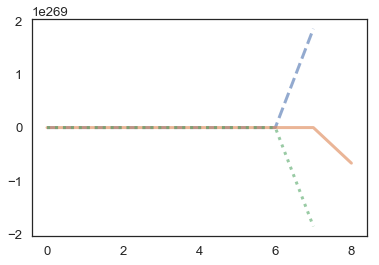

In [60]:
plot_res(V, I, R)

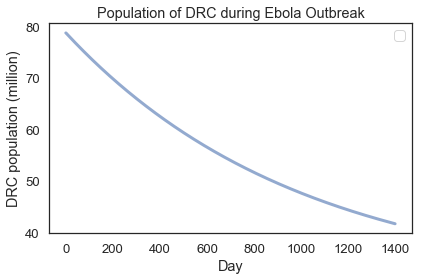

In [20]:
# Total Pop
plot (time, results/1e6)
decorate(xlabel='Day', 
         ylabel='DRC population (million)',
         title='Population of DRC during Ebola Outbreak')